In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("diabetes_preprocessed.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,54.0,0,0,No Info,27.32,6.6,80,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
89667,Female,80.0,0,0,former,32.53,6.6,140,0
89668,Male,80.0,0,0,No Info,23.87,4.5,80,0
89669,Male,80.0,0,1,No Info,17.50,4.8,200,0
89670,Female,80.0,0,0,No Info,27.32,5.7,155,0


In [56]:
df_smoking_diabetes = df[ ["smoking_history", "diabetes"] ]
df_smoking_diabetes

,smoking_history,diabetes
0,No Info,0
1,never,0
2,current,0
3,current,0
4,never,0
...,...,...
89667,former,0
89668,No Info,0
89669,No Info,0
89670,No Info,0


/home/mystimorphix/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mystimorphix/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mystimorphix/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mystimorphix/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

Text(-5.797297839506177, 0.5, 'Counts')

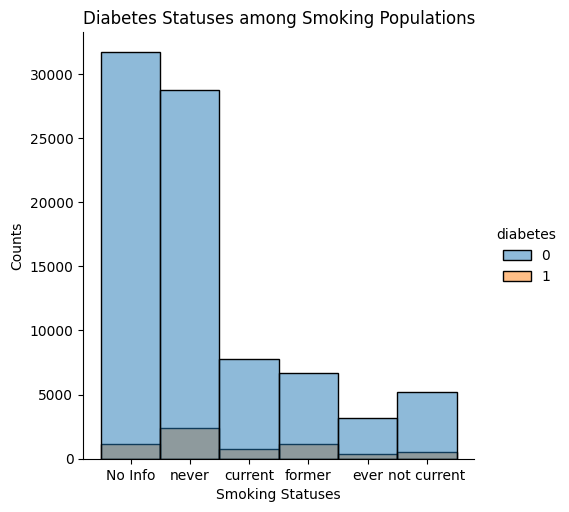

In [57]:
sns.displot(df_smoking_diabetes, x="smoking_history", hue="diabetes", discrete=True)
plt.title("Diabetes Statuses among Smoking Populations")
plt.xlabel("Smoking Statuses")
plt.ylabel("Counts")

In [58]:
df_smoking_diabetes_counts = pd.DataFrame(df_smoking_diabetes.value_counts()).reset_index()
df_smoking_diabetes_counts

,smoking_history,diabetes,count
0,No Info,0,31665
1,never,0,28773
2,current,0,7800
3,former,0,6672
4,not current,0,5173
5,ever,0,3190
6,never,1,2433
7,former,1,1173
8,No Info,1,1127
9,current,1,786


# Format to Calculate Percentages and Create Graph

In [59]:
smoking_statuses = set(df_smoking_diabetes_counts["smoking_history"].to_list())
percentages = []

for status in smoking_statuses:
    # get counts for each smoking_history category
    df_temp = df_smoking_diabetes_counts[df_smoking_diabetes_counts["smoking_history"] == status]
    print(df_temp)

    # calculate percentages in decimal form
    data = df_temp["count"].tolist()
    print(data)

    data = [status, data[1] / sum(data) * 100]
    percentages.append(data)
percentages

  smoking_history  diabetes  count
3          former         0   6672
7          former         1   1173
[6672, 1173]
   smoking_history  diabetes  count
5             ever         0   3190
11            ever         1    369
[3190, 369]
  smoking_history  diabetes  count
1           never         0  28773
6           never         1   2433
[28773, 2433]
  smoking_history  diabetes  count
2         current         0   7800
9         current         1    786
[7800, 786]
  smoking_history  diabetes  count
0         No Info         0  31665
8         No Info         1   1127
[31665, 1127]
   smoking_history  diabetes  count
4      not current         0   5173
10     not current         1    511
[5173, 511]


[['former', 14.952198852772467],
 ['ever', 10.368080921607193],
 ['never', 7.796577581234378],
 ['current', 9.15443745632425],
 ['No Info', 3.436813857038302],
 ['not current', 8.990147783251231]]

In [60]:
df_smoking_diabetes_percentages = pd.DataFrame(percentages, columns=["Smoking Statuses", "Percentages"])
df_smoking_diabetes_percentages

,Smoking Statuses,Percentages
0,former,14.952199
1,ever,10.368081
2,never,7.796578
3,current,9.154437
4,No Info,3.436814
5,not current,8.990148


<Axes: title={'center': 'Correlation of Smoking Statuses against Positive Diabetes Diagnoses'}, xlabel='Smoking Statuses'>

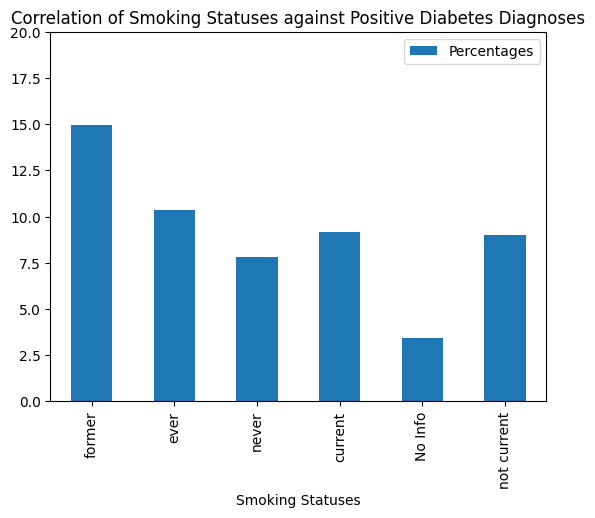

In [61]:
df_smoking_diabetes_percentages.plot(kind="bar", title="Correlation of Smoking Statuses against Positive Diabetes Diagnoses", x="Smoking Statuses", y="Percentages", ylim=(0,20))

In [62]:
df.groupby("smoking_history").size()

smoking_history
No Info        32792
current         8586
ever            3559
former          7845
never          31206
not current     5684
dtype: int64